In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[[ 'b']]
X.columns=['sr0']
X.tail()

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [2]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

14 seconds


In [3]:
def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values #dataframe.as_matrix() 
    ''' why need astpye(int/str), otherwise error with y_type=object??'''
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_f(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

In [ ]:
################    1  linear_model    Regression

In [ ]:
################    1.1  linear_model.ARDRegression
'''
The advantages of Bayesian Regression are:

It adapts to the data at hand.
It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:

Inference of the model can be time consuming.
'''

In [ ]:
from sklearn.linear_model import ARDRegression

starttime = datetime.now()
#start = time.time()

pipe_ARDReg = Pipeline([('clf', ARDRegression(random_state=14))])
param_ARDReg = {'clf__n_iter': [300, ], #default = 300
                'clf__tol': [0.001, ], #default =0.001, Stop the algorithm if w has converged
                'clf__alpha_1': [1e-06, ], #default =1e-06,
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter
                'clf__alpha_2': [1e-06, ],
                #Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter
                'clf__lambda_1': [1e-06, ], 
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter
                'clf__lambda_2': [1e-06, ],
                'clf__compute_score': [False, ],
                'clf__threshold_lambda': [10000.0, ], #default = 1.e+4
                #threshold for removing (pruning) weights with high precision from the computation. Default is 1.e+4.
                'clf__fit_intercept': [True, ],
                'clf__normalize': [False, ],
                #This parameter is ignored when fit_intercept is set to False
                'clf__copy_X': [True, ],
                'clf__verbose': [False, ]
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    #df_ = df_.iloc[:,-30:]
    total_f(pipe_ARDReg, param_ARDReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
from sklearn.linear_model import BayesianRidge
starttime = datetime.now()
#start = time.time()

pipe_BRidge = Pipeline([('clf', BayesianRidge(random_state=14))])
param_BRidge = {'clf__n_iter': [300， ], #default = 300
                'clf__tol': [0.001, ], #default =0.001, Stop the algorithm if w has converged
                'clf__alpha_1': [1e-06, ], #default =1e-06,
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter
                'clf__alpha_2': [1e-06, ],
                #Hyper-parameter : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter
                'clf__lambda_1': [1e-06, ], 
                #Hyper-parameter : shape parameter for the Gamma distribution prior over the lambda parameter
                'clf__lambda_2': [1e-06, ],
                'clf__compute_score': [False, ],
                'clf__fit_intercept': [True, ],
                'clf__normalize': [False, ],
                #This parameter is ignored when fit_intercept is set to False
                'clf__copy_X': [True, ],
                'clf__verbose': [False, ]
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    #df_ = df_.iloc[:,-30:]
    total_f(pipe_BRidge, param_BRidge)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.2  linear_model.ElasticNetCV
'''
Minimizes the objective function:
1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

alpha = a + b and l1_ratio = a / (a + b)
'''

In [ ]:
from sklearn.linear_model import ElasticNetCV
starttime = datetime.now()

pipe_ElastcNet = Pipeline([('clf', ElasticNetCV(random_state=14, n_jobs=-1))])
param_ElastcNet = {'clf__l1_ratio': [0.5， ], #default = 0.5
                   #For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty.
                   'clf__eps': [0.001, ], #Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3.
                'clf__n_alphas': [100, ], #Number of alphas along the regularization path, used for each l1_ratio.
                'clf__alphas': [None, ], #List of alphas where to compute the models. If None alphas are set automatically
                   'clf__fit_intercept': [True, ],
                   'clf__normalize': [False, ],
                   'clf__precompute1': ['auto', ], 
                   #Whether to use a precomputed Gram matrix to speed up calculations. 
                   #If set to 'auto' let us decide. The Gram matrix can also be passed as argument.
                   'clf__max_iter': [1000, ],
                'clf__tol': [0.0001, ],
                'clf__cv': [None, ],
                
                #This parameter is ignored when fit_intercept is set to False
                'clf__copy_X': [True, ],
                'clf__verbose': [0, ],
                   'clf__positve': [False, ], #When set to True, forces the coefficients to be positive
                   'clf__selection': ['cyclic', 'random'] #default='cyclic'
                   #'random': a random coefficient is updated every iteration rather than looping over features sequentially by default. 
                   #This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_ElastcNet, param_ElastcNet)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.3  linear_model.HuberRegressor
'''
The HuberRegressor differs from using SGDRegressor with loss set to huber in the following ways.

HuberRegressor is scaling invariant. 
Once epsilon is set, scaling X and y down or up by different values would produce the same robustness to outliers as before. 
as compared to SGDRegressor where epsilon has to be set again when X and y are scaled.
HuberRegressor should be more efficient to use on data with small number of samples 
while SGDRegressor needs a number of passes on the training data to produce the same robustness.
'''

In [ ]:
from sklearn.linear_model import HuberRegressor
starttime = datetime.now()

pipe_HuberReg = Pipeline([('clf', HuberRegressor(random_state=14, n_jobs=-1))])
param_HuberReg = {'clf__epsilon': [1.35， ], #default = 1.35
                  #The parameter epsilon controls the number of samples that should be classified as outliers. 
                  #The smaller the epsilon, the more robust it is to outliers.
                  'clf__max_iter': [100, ], #
                  'clf__alpha': [0.0001, ], #Regularization parameter
                  'clf__warm_start': [False, ],
                  'clf__fit_intercept': [True, ],
                  'clf__tol': [1e-05, ]
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_ElastcNet, param_ElastcNet)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.4  linear_model.LarsCV
'''
Least-angle regression (LARS) is a regression algorithm for high-dimensional data; similar to forward stepwise regression. 
At each step, it finds the predictor most correlated with the response. When there are multiple predictors having equal correlation, 
instead of continuing along the same predictor, it proceeds in a direction equiangular between the predictors.

The advantages of LARS are:

It is numerically efficient in contexts where p >> n (i.e., when the number of dimensions is significantly greater than the number of points)
It is computationally just as fast as forward selection and has the same order of complexity as an ordinary least squares.
It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
If two variables are almost equally correlated with the response, then their coefficients should increase at approximately the same rate. 
The algorithm thus behaves as intuition would expect, and also is more stable.
It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. 
This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.
'''

In [ ]:
from sklearn.linear_model import LarsCV
starttime = datetime.now()

pipe_LarsCV = Pipeline([('clf', LarsCV(random_state=14, n_jobs=-1))])
param_LarsCV = {'clf__fit_intercept': [True， ], #default =
                  'clf__verbose': [False, ], #
                  'clf__max_iter': [500, ], #
                  'clf__normalize': [True, ],
                  'clf__precompute': ['auto', ],
                  'clf__cv': [None, ],
                'clf__max_n_alphas': [1000, ],
                #The maximum number of points on the path used to compute the residuals in the cross-validation
                'clf__eps': [2.2204460492503131e-16, ],
                'clf__copy_X': [True, ],
                'clf__positive': [False, ]
                #Restrict coefficients to be >= 0. Be aware that you might want to remove fit_intercept which is set True by default.
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LarsCV, param_LarsCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.5  linear_model.LassoCV
'''
The Lasso is a linear model that estimates sparse coefficients. 
It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, 
effectively reducing the number of variables upon which the given solution is dependent. For this reason, 
the Lasso and its variants are fundamental to the field of compressed sensing. 
Under certain conditions, it can recover the exact set of non-zero weights
'''

In [ ]:
from sklearn.linear_model import LassoCV
starttime = datetime.now()

pipe_LassoCV = Pipeline([('clf', LassoCV(random_state=14, n_jobs=-1))])
param_LassoCV = {'clf__eps': [0.001， ], #default =0.001, Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3.
                  'clf__n_alphas': [100, ], #Number of alphas along the regularization path
                  'clf__alphas': [None, ], # numpy array, List of alphas where to compute the models. If None alphas are set automatically
                  'clf__fit_intercept': [True, ],
                 'clf__normalize': [False, ],
                  'clf__precompute': ['auto', ],
                 'clf__max_iter': [1000, ],
                 'clf__tol': [0.0001, ],
                 'clf__copy_X': [True, ],
                  'clf__cv': [None, ],
                'clf__verbose': [False, ],
                #The maximum number of points on the path used to compute the residuals in the cross-validation
                'clf__positive': [False, ],
                'clf__selection': ['cyclic', 'random']
                #random: a random coefficient is updated every iteration rather than looping over features sequentially by default. 
                 #This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LassoCV, param_LassoCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.6  linear_model.LassoLarsCV
'''
The Lasso is a linear model that estimates sparse coefficients. 
It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, 
effectively reducing the number of variables upon which the given solution is dependent. For this reason, 
the Lasso and its variants are fundamental to the field of compressed sensing. 
Under certain conditions, it can recover the exact set of non-zero weights
'''

In [ ]:
from sklearn.linear_model import LassoLarsCV
starttime = datetime.now()

pipe_LassoLarsCV = Pipeline([('clf', LassoLarsCV(random_state=14, n_jobs=-1))])
param_LassoLarsCV = {'clf__fit_intercept': [True， ], #default =
                      'clf__verbose': [False, ], #
                  'clf__max_iter': [500, ], #
                  'clf__normalize': [True, ],
                  'clf__precompute': ['auto', ],
                  'clf__cv': [None, ],
                'clf__max_n_alphas': [1000, ],
                #The maximum number of points on the path used to compute the residuals in the cross-validation
                'clf__eps': [2.2204460492503131e-16, ],
                'clf__copy_X': [True, ],
                'clf__positive': [False, ]
                #Restrict coefficients to be >= 0. Be aware that you might want to remove fit_intercept which is set True by default.
                  }
#parameters is same to LarsCV
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LassoLarsCV, param_LassoLarsCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.7  linear_model.LinearRegression
'''

'''

In [ ]:
from sklearn.linear_model import LinearRegression
starttime = datetime.now()

pipe_LinearReg = Pipeline([('clf', LinearRegression(random_state=14, n_jobs=-1))])
param_LinearReg = {'clf__fit_intercept': [True， ], #default =
                   'clf__normalize': [False, ], #
                   'clf__copy_X': [True, ]
                  }
#parameters is same to LarsCV
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LinearReg, param_LinearReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.8  linear_model.MultiTaskLassoCV
'''
Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer
The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||Y - XW||^2_Fro + alpha * ||W||_21
Where:
||W||_21 = \sum_i \sqrt{\sum_j w_{ij}^2}
i.e. the sum of norm of each row.
'''

In [ ]:
from sklearn.linear_model import MultiTaskLassoCV
starttime = datetime.now()

pipe_MultiTaskLasso = Pipeline([('clf', MultiTaskLassoCV(random_state=14, n_jobs=-1))])
param_MultiTaskLasso = {'clf__eps': [0.001, ], #Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3
                        'clf__n_alphas': [100， ], #Number of alphas along the regularization path
                        'clf__alphas': [None, ], #array-like,
                        'clf__fit_intercept': [True, ],
                        'clf__normalize': [False, ],
                        'clf__max_iter': [1000, ],
                        'clf__tol': [0.0001, ],
                        'clf__copy_X': [True, ], 
                        'clf__cv': [None, ], 
                        'clf__verbose': [False, ],
                        'clf__selection': ['cyclic', 'random']
                #random: a random coefficient is updated every iteration rather than looping over features sequentially by default. 
                 #This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.
                  }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_MultiTaskLasso, param_MultiTaskLasso)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.9  linear_model.MultiTaskElasticNetCV
'''
Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer
The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||Y - XW||^2_Fro + alpha * ||W||_21
Where:
||W||_21 = \sum_i \sqrt{\sum_j w_{ij}^2}
i.e. the sum of norm of each row.
'''

In [ ]:
from sklearn.linear_model import MultiTaskElasticNetCV
starttime = datetime.now()
l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, max_iter=1000, tol=0.0001, cv=None,
copy_X=True, verbose=0, n_jobs=1, random_state=None, selection=’cyclic’
pipe_MultiTaskElastcNet = Pipeline([('clf', MultiTaskElasticNetCV(random_state=14, n_jobs=-1))])
param_MultiTaskElasticNetCV = {'clf__l1_ratio': [0.5， ], #default = 0.5
                   #For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty.
                               'clf__eps': [0.001, ], #Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3.
                               'clf__n_alphas': [100, ], #Number of alphas along the regularization path, used for each l1_ratio.
                               'clf__alphas': [None, ], #List of alphas where to compute the models. If None alphas are set automatically
                               'clf__fit_intercept': [True, ],
                               'clf__normalize': [False, ],
                               'clf__max_iter': [1000, ],                      
                               'clf__tol': [0.0001, ],
                               'clf__cv': [None, ],
                               'clf__copy_X': [True, ],
                               'clf__verbose': [0, ],
                               'clf__selection': ['cyclic', 'random'] #default='cyclic'
                   #'random': a random coefficient is updated every iteration rather than looping over features sequentially by default. 
                   #This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.
                              }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_MultiTaskElasticNetCV, param_MultiTaskElasticNetCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    1.10  linear_model.OrthogonalMatchingPursuitCV
'''
OrthogonalMatchingPursuit and orthogonal_mp implements the OMP algorithm for approximating the fit of a linear model 
with constraints imposed on the number of non-zero coefficients (ie. the L 0 pseudo-norm).
Alternatively, orthogonal matching pursuit can target a specific error instead of a specific number of non-zero coefficients. 
OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. 
It is similar to the simpler matching pursuit (MP) method, but better in that at each iteration, 
the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.
'''

In [ ]:
from sklearn.linear_model import MultiTaskLassoCV
starttime = datetime.now()

pipe_OPMCV = Pipeline([('clf', OrthogonalMatchingPursuitCV(random_state=14, n_jobs=-1))])
param_OPMCV = {'clf__copy': [True, ], # #default=True
               #Whether the design matrix X must be copied by the algorithm. 
               #A false value is only helpful if X is already Fortran-ordered, otherwise a copy is made anyway.
               'clf__fit_intercept': [True, ],
               'clf__normalize': [True, ], #default=True
               'clf__max_iter': [None, ], #default=None
               'clf__cv': [None, ], 
               'clf__verbose': [False, ]  #default=False
              }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_OPMCV, param_OPMCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.11  linear_model.PassiveAggressiveeRegressor
'''
The passive-aggressive algorithms are a family of algorithms for large-scale learning. 
They are similar to the Perceptron in that they do not require a learning rate. 
However, contrary to the Perceptron, they include a regularization parameter C.

For classification, PassiveAggressiveClassifier can be used with loss='hinge' (PA-I) or loss='squared_hinge' (PA-II). 
For regression, PassiveAggressiveRegressor can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).
'''

In [ ]:
from sklearn.linear_model import PassiveAggressiveeRegressor
starttime = datetime.now()

pipe_PAReg = Pipeline([('clf', PassiveAggressiveeRegressor(random_state=14))])
param_PAReg = {'clf__C': [1.0, ], # #default=1.0, Maximum step size (regularization)
               'clf__fit_intercept': [True, ],
               'clf__max_iter': [None, ], #default=None
               #The maximum number of passes over the training data (aka epochs). 
               #It only impacts the behavior in the fit method, and not the partial_fit.
               'clf__tol': [None, ], #Defaults to 1e-3 , stop when (loss > previous_loss - tol)
               'clf__shuffle': [True, ],  #default=True, Whether or not the training data should be shuffled after each epoch.
               'clf__verbose': [0, ],  #default=0, 
               'clf__loss': ['epsilon_insensitive', ],  #default=epsilon_insensitive, 
               #epsilon_insensitive: equivalent to PA-I. squared_epsilon_insensitive: equivalent to PA-II in the reference paper.
               'clf__epsilon': [0.1, ],  #default=False, 
               #If the difference between the current prediction and the correct label is below this threshold, the model is not updated.
               'clf__warm_start': [False, ],  #default=False
               'clf__average': [False, ],  #default=False
               #When set to True, computes the averaged SGD weights and stores the result in the coef_ attribute. 
               #If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. 
               #So average=10 will begin averaging after seeing 10 samples.
               'clf__n_iter': [None, ]  #default=False
              }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_PAReg, param_PAReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.12  linear_model.Perceptron
'''
The Perceptron is another simple algorithm suitable for large scale learning. By default:

It does not require a learning rate.
It is not regularized (penalized).
It updates its model only on mistakes.
The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss 
and that the resulting models are sparser.
'''

In [ ]:
from sklearn.linear_model import Perceptron
starttime = datetime.now()

pipe_Perceptron = Pipeline([('clf', Perceptron(random_state=14, n_jobs=-1))])
param_Perceptron = {'clf__penalty': [None, ], #default=None; l2, l1 or elasticnet; The penalty (aka regularization term) to be used
                    'clf__alpha': [0.0001, ], #default=0.0001, Constant that multiplies the regularization term if regularization is used. 
                    'clf__fit_intercept': [True, ], #default=True
                    'clf__max_iter': [None, ], #Defaults to 5. Defaults to 1000 from 0.21, or if tol is not None.
                    'clf__tol': [None, ],
                    'clf__shuffle': [True, ],  #default=True, Whether or not the training data should be shuffled after each epoch.
                    'clf__verbose': [0, ],  #default=0, 
                    'clf__eta0': [1.0, ],  #default=epsilon_insensitive, 
               #epsilon_insensitive: equivalent to PA-I. squared_epsilon_insensitive: equivalent to PA-II in the reference paper.
                    'clf__class_weight': [None, ],  #default=False, 
               #If the difference between the current prediction and the correct label is below this threshold, the model is not updated.
                    'clf__warm_start': [False, ],  #default=False
                    'clf__n_iter': [None, ]  #default=False
                   }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_Perceptron, param_Perceptron)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.13  linear_model.RANSACRegressor
'''
RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.

RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, 
which is dependent on the number of iterations (see max_trials parameter). 
It is typically used for linear and non-linear regression problems and is especially popular in the fields of photogrammetric computer vision.

The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, 
which are e.g. caused by erroneous measurements or invalid hypotheses about the data. 
The resulting model is then estimated only from the determined inliers.
'''

In [ ]:
from sklearn.linear_model import RANSACRegressor
starttime = datetime.now()

pipe_RANSACReg = Pipeline([('clf', RANSACRegressor(random_state=14))])
param_RANSACReg = {'clf__base_estimator': [None, ], #default=None=base_estimator=sklearn.linear_model.LinearRegression()
                   #the current implementation only supports regression estimators.
                    'clf__min_samples': [None, ], # int (>= 1) or float ([0, 1]); min_samples is chosen as X.shape[1] + 1.
                    'clf__residual_threshold': [None, ], #default:  median absolute deviation of the target values y
                    'clf__is_data_valid': [None, ], #Defaults 
                    'clf__is_model_valid': [None, ],
                    'clf__max_trials': [100, ],  #default=True, Whether or not the training data should be shuffled after each epoch.
                    'clf__max_skips': [inf, ],  #default=0, 
                   #Maximum number of iterations that can be skipped 
                   #due to finding zero inliers or invalid data defined by is_data_valid or invalid models defined by is_model_valid.
                    'clf__stop_n_inliers': [inf, ],  #default=
                    'clf__stop_score': [inf, ],  #default=
                    'clf__stop_probability': [0.99, ],  #stops if at least one outlier-free set of the training data is sampled in RANSAC. 
                    'clf__residual_metric': [None, ],  #default=
                   #Metric to reduce the dimensionality of the residuals to 1 for multi-dimensional target values y.shape[1] > 1. 
                   #By default the sum of absolute differences is used: lambda dy: np.sum(np.abs(dy), axis=1)
                   'clf__loss': ['absolute_loss', 'squared_loss']  #default
                   #If loss is a callable, then it should be a function that takes two arrays as inputs, 
                   #the true and predicted value and returns a 1-D array with the i-th value of the array corresponding to the loss on X[i].
                   #If the loss on a sample is greater than the residual_threshold, then this sample is classified as an outlier.
                   }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_RANSACReg, param_RANSACReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.14  linear_model.RidgeCV
'''
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. 
The ridge coefficients minimize a penalized residual sum of squares, min||Xw-y||^2+alpha*||w||^2; 
alpha>= 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of alpha, 
the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
'''

In [ ]:
from sklearn.linear_model import RidgeCV
starttime = datetime.now()

pipe_RidgeCV = Pipeline([('clf', RidgeCV(random_state=14))])
param_RidgeCV = {'clf__alphas': [(0.1, 1.0, 10.0), ], #default=(0.1, 1.0, 10.0)
                 #Array of alpha values to try. Regularization strength; must be a positive float. 
                 #Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
                 #Larger values specify stronger regularization. 
                 #Alpha corresponds to C^-1 in other linear models such as LogisticRegression or LinearSVC.
                    'clf__fit_intercept': [True, ], # 
                    'clf__normalize': [False, ], #default:  median absolute deviation of the target values y
                    'clf__scoring': [None, ], #Defaults 
                    'clf__cv': [None, ],
                 #For integer/None inputs, if y is binary or multiclass, sklearn.model_selection.StratifiedKFold is used, 
                 #else, sklearn.model_selection.KFold is used.
                    'clf__gcv_mode': [None, 'auto', 'svd', 'eigen'],  #default=None=auto
                 #'auto' : use svd if n_samples > n_features or when X is a sparse matrix, otherwise use eigen
                 #'svd' : force computation via singular value decomposition of X (does not work for sparse matrices)
                 #'eigen' : force computation via eigendecomposition of X^T X 
                 'clf__store_cv_values': [False, ],  #default=0, 
                }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_RidgeCV, param_RidgeCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.15  linear_model.SGDRegressor
'''
SGD applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. 
For sparse data, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:
Efficiency.
Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
SGD is sensitive to feature scaling.
'''

In [ ]:
from sklearn.linear_model import SGDRegressor
starttime = datetime.now()

pipe_SGDReg = Pipeline([('clf', SGDRegressor(random_state=14))])
param_SGDReg = {'clf__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], #default=squared_loss
                #'squared_loss': ordinary least squares fit  
                #'huber': modifies 'squared_loss' to focus less on getting outliers correct 
                #     by switching from squared to linear loss past a distance of epsilon               
                #'epsilon_insensitive': ignores errors less than epsilon and is linear past that; this is the loss function used in SVR.
                #'squared_epsilon_insensitive': the same but becomes squared loss past a tolerance of epsilon.
                'clf__penalty': ['l2', 'l1', 'elasticnet', None], # default='l2' 
                'clf__alpha': [0.0001, ], #default=0.0001;  Constant that multiplies the regularization term
                'clf__l1_ratio': [0.15, ], #Default=0.15; The Elastic Net mixing parameter
                'clf__fit_intercept': [True, ],
                 #For integer/None inputs, if y is binary or multiclass, sklearn.model_selection.StratifiedKFold is used, 
                 #else, sklearn.model_selection.KFold is used.
                'clf__max_iter': [None,],  #default=None
                'clf__tol': [None,],  #default=None
                'clf__shuffle': [True,],  #default=True
                'clf__verbose': [0,],  #default=0
                'clf__epsilon': [0.1,],  #default=0.1
                # only if loss is 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.
                #For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. 
                #For epsilon-insensitive, any differences between the current prediction and the correct label are ignored 
                #    if they are less than this threshold.
                'clf__learning_rate': ['invscaling',],  #default='invscaling'
                #The learning rate schedule:
                #    ‘constant’: eta = eta0; 
                #    ‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
                #    ‘invscaling’: eta = eta0 / pow(t, power_t); 
                #where t0 is chosen by a heuristic proposed by Leon Bottou.
                'clf__eta0': [0.01,],  #default=0.01, double; The initial learning rate 
                'clf__power_t': [0.25,],  #default=0.25, double; The exponent for inverse scaling learning rate
                'clf__warm_start': [False,],  #default=False
                'clf__average': [False,],  #default=False
                #When set to True, computes the averaged SGD weights and stores the result in the coef_ attribute. 
                #If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. 
                #So average=10 will begin averaging after seeing 10 samples.
                'clf__n_iter': [None,] 
                }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_SGDReg, param_SGDReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    1.16  linear_model.TheilSenRegressor
'''
The TheilSenRegressor estimator uses a generalization of the median in multiple dimensions. It is thus robust to multivariate outliers. 
Note however that the robustness of the estimator decreases quickly with the dimensionality of the problem. 
It looses its robustness properties and becomes no better than an ordinary least squares in high dimension.
'''

In [ ]:
from sklearn.linear_model import TheilSenRegressor
starttime = datetime.now()
(fit_intercept=True, =True, 
                  =10000.0, =None, max_iter=300, tol=0.001, random_state=None, , =False)
pipe_TheilSenReg = Pipeline([('clf', TheilSenRegressor(random_state=14, n_jobs=-1))])
param_TheilSenReg = {'clf__fit_intercept': [True, ],
                     'clf__copy_X': [True,],  #default=True
                     'clf__max_subpopulation': [10000,],  #default=1e4
                     'clf__n_subsamples': [None,],  #default=None;  Number of samples to calculate the parameters. 
                     #This is at least the number of features (plus 1 if fit_intercept=True) and the number of samples as a maximum. 
                     #A lower number leads to a higher breakdown point and a low efficiency 
                     #while a high number leads to a low breakdown point and a high efficiency. 
                     #If None, take the minimum number of subsamples leading to maximal robustness. 
                     #If n_subsamples is set to n_samples, Theil-Sen is identical to least squares.
                     'clf__max_iter': [300,],  #default=300
                     'clf__tol': [0.001,],  #default=0
                     'clf__verbose': [False,]  #default=0.1
                    }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_TheilSenReg, param_TheilSenReg)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    2   linear_model    classifier

In [ ]:
################    2.1  linear_model.LogisticRegressionCV
'''
This class implements logistic regression using liblinear, newton-cg, sag of lbfgs optimizer. 
The newton-cg, sag and lbfgs solvers support only L2 regularization with primal formulation. 
The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty.

For the grid of Cs values (that are set by default to be ten values in a logarithmic scale between 1e-4 and 1e4), 
the best hyperparameter is selected by the cross-validator StratifiedKFold, but it can be changed using the cv parameter. 
In the case of newton-cg and lbfgs solvers, we warm start along the path 
i.e guess the initial coefficients of the present fit to be the coefficients got after convergence in the previous fit, 
so it is supposed to be faster for high-dimensional dense data.

For a multiclass problem, the hyperparameters for each class are computed using the best scores got by doing a one-vs-rest
in parallel across all folds and classes. Hence this is not the true multinomial loss.
'''

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 20.8min finished
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef

df_R0 [6] precison: [ 0.05  0.05  0.06] recall: [ 0.05  0.05  0.07] f1: [ 0.05  0.05  0.06]
Pipeline(steps=[('clf', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=14,
           refit=True, scoring=None, solver='sag', tol=0.0001, verbose=0))])
             precision    recall  f1-score   support

          1       0.12      0.12      0.12        25
          2       0.00      0.00      0.00        27
          3       0.04      0.05      0.04        22
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        25
          6       0.00      0.00      0.00        15
          7       0.05      0.04      0.05        23
          8       0.00      0.00      0.00        19
          9       0.14      0.11      0.12        37
         10       0.12      0.03      0.05        31
         11    

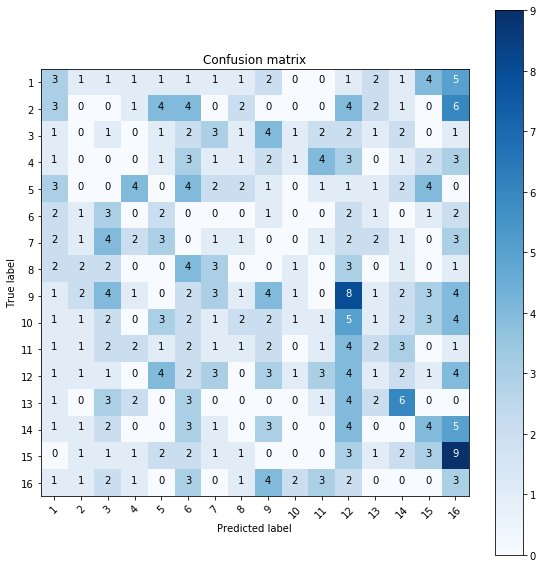

6560 seconds


In [9]:
from sklearn.linear_model import LogisticRegressionCV
starttime = datetime.now()

pipe_LogRegCV = Pipeline([('clf', LogisticRegressionCV(random_state=14, n_jobs=1))])
param_LogRegCV = {'clf__Cs': [10, ], #list of float|int
                  #Each of the values in Cs describes the inverse of regularization strength. 
                  #If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4. 
                  #Like in support vector machines, smaller values specify stronger regularization.
                  'clf__fit_intercept': [True, ], #default =
                  'clf__cv': [None, ], #
                  'clf__dual': [False, ], #
                  #Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver.
                  #Prefer dual=False when n_samples > n_features.
                  'clf__penalty': ['l2', ], #
                  #The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
                  'clf__scoring': [None, ], #
                  'clf__solver': ['lbfgs', 'newton-cg', 'sag'], #default: ‘lbfgs’
                  #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and‘saga’ are faster for large ones.
                  #For multiclass problems, only newton-cg, sag, saga and lbfgs handle multinomial loss; liblinear is limited to ovr schemes.
                  #‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
                  #liblinear’ might be slower in LogisticRegressionCV because it does not handle warm-starting.
                  #Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. 
                  #You can preprocess the data with a scaler from sklearn.preprocessing.
                  'clf__tol': [0.0001, ], #
                  'clf__max_iter': [1000, ], #
                  'clf__class_weight': [None, ], #
                  'clf__verbose': [0, ], #
                  'clf__refit': [True, ], #
                  'clf__intercept_scaling': [1.0, ], #
                  #Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. 
                  'clf__multi_class': ['ovr', ] #
                 }

for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_LogRegCV, param_LogRegCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2.2  linear_model.PassiveAggressiveClassifier
'''
The passive-aggressive algorithms are a family of algorithms for large-scale learning. 
They are similar to the Perceptron in that they do not require a learning rate. 
However, contrary to the Perceptron, they include a regularization parameter C.

For classification, PassiveAggressiveClassifier can be used with loss='hinge' (PA-I) or loss='squared_hinge' (PA-II). 
For regression, PassiveAggressiveRegressor can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).
'''

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   33.1s finished


df_R0 [10] precison: [ 0.06474147  0.04920858  0.08036062] recall: [ 0.07196402  0.06344411  0.06838906] f1: [ 0.06039074  0.04772467  0.05704069]
Pipeline(steps=[('clf', PassiveAggressiveClassifier(C=1.0, class_weight=None, fit_intercept=True,
              loss='hinge', n_iter=1000, n_jobs=-1, random_state=14,
              shuffle=True, verbose=0, warm_start=False))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.00      0.00      0.00        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.14      0.04      0.06        25
          6       0.00      0.00      0.00        15
          7       0.12      0.04      0.06        23
          8       0.05      0.11      0.07        19
          9       0.10      0.05      0.07        37
         10       0.07      0.06      0.07        31
         11       0.08      0.04      0.06

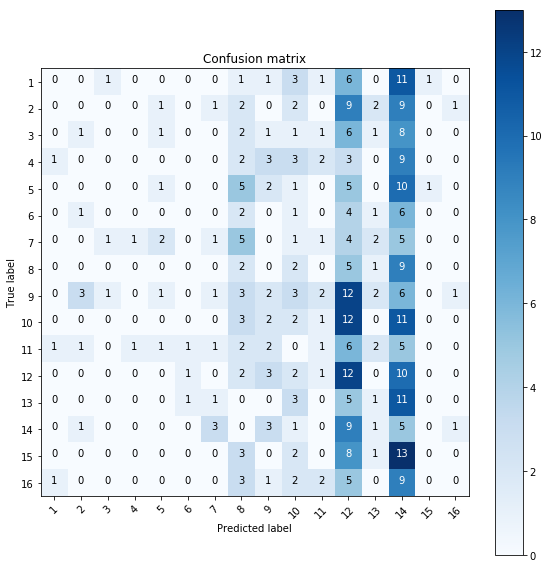

84 seconds


"\nsome parameters are unavilible; see 'PassiveAggressiveClassifier().get_params().keys()'\n#'clf__max_iter': [None, ],\n#'clf__tol': [None, ],\n#'clf__average': [False, ],\n'clf__n_iter': [100, ]  #default=None was not support, only int\n"

In [5]:
from sklearn.linear_model import PassiveAggressiveClassifier
starttime = datetime.now()

pipe_PAClassifier = Pipeline([('clf', PassiveAggressiveClassifier(random_state=14, n_jobs=-1))])
param_PAClassifier = {'clf__C': [1.0, ], # #default=1.0, Maximum step size (regularization)
                      'clf__fit_intercept': [True, ],
                      #'clf__max_iter': [None, ], #default=None; Defaults to 5. Defaults to 1000 from 0.21, or if tol is not None.
               #The maximum number of passes over the training data (aka epochs). 
               #It only impacts the behavior in the fit method, and not the partial_fit.
                      #'clf__tol': [None, ], #Defaults to 1e-3 , stop when (loss > previous_loss - tol)
                      'clf__shuffle': [True, ],  #default=True, Whether or not the training data should be shuffled after each epoch.
                      'clf__verbose': [0, ],  #default=0, 
                      'clf__loss': ['hinge', 'squared_hinge'],  #default=epsilon_insensitive, 
               #hinge: equivalent to PA-I in the reference paper. squared_hinge: equivalent to PA-II in the reference paper.
                      'clf__warm_start': [False, ],  #default=False
                      'clf__class_weight': [None, ],  #default=None
                      #'clf__average': [False, ],  #default=False
               #When set to True, computes the averaged SGD weights and stores the result in the coef_ attribute. 
               #If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. 
               #So average=10 will begin averaging after seeing 10 samples.
                      'clf__n_iter': [1000, ]  #default=
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_PAClassifier, param_PAClassifier)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')
'''
some parameters are unavilible; see 'PassiveAggressiveClassifier().get_params().keys()'
#'clf__max_iter': [None, ],
#'clf__tol': [None, ],
#'clf__average': [False, ],
'clf__n_iter': [100, ]  #default=None was not support, only int
'''

In [ ]:
################    2.3  linear_model.RidgeClassifierCV
'''
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. 
The ridge coefficients minimize a penalized residual sum of squares, min||Xw-y||^2+alpha*||w||^2; 
alpha>= 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of alpha, 
the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
'''

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.2s finished


df_R0 [10] precison: [ 0.06  0.06  0.07] recall: [ 0.06  0.06  0.07] f1: [ 0.06  0.06  0.07]
Pipeline(steps=[('clf', RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), class_weight=None, cv=None,
         fit_intercept=True, normalize=False, scoring=None))])
             precision    recall  f1-score   support

          1       0.08      0.08      0.08        25
          2       0.09      0.07      0.08        27
          3       0.04      0.05      0.04        22
          4       0.05      0.04      0.05        23
          5       0.12      0.12      0.12        25
          6       0.00      0.00      0.00        15
          7       0.04      0.04      0.04        23
          8       0.00      0.00      0.00        19
          9       0.08      0.03      0.04        37
         10       0.00      0.00      0.00        31
         11       0.00      0.00      0.00        24
         12       0.09      0.10      0.10        31
         13       0.18      0.18      0.18        22
      

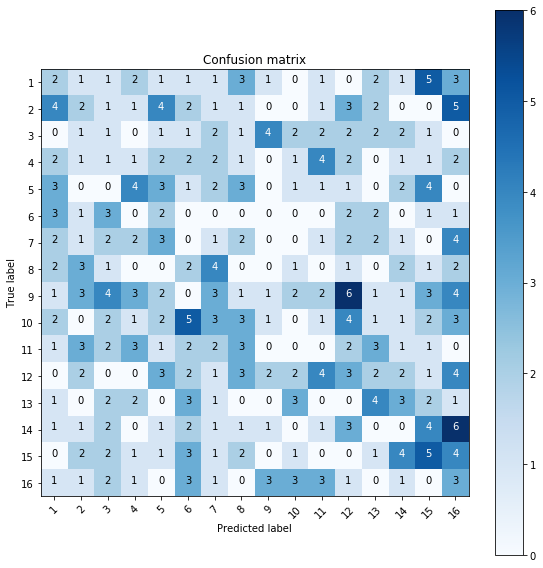

8 seconds


In [6]:
from sklearn.linear_model import RidgeClassifierCV
starttime = datetime.now()

pipe_RidgeClassifierCV = Pipeline([('clf', RidgeClassifierCV())])
param_RidgeClassifierCV = {'clf__alphas': [(0.1, 1.0, 10.0), ], #default=(0.1, 1.0, 10.0)
                 #Array of alpha values to try. Regularization strength; must be a positive float. 
                 #Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
                 #Larger values specify stronger regularization. 
                 #Alpha corresponds to C^-1 in other linear models such as LogisticRegression or LinearSVC.
                    'clf__fit_intercept': [True, ], # 
                    'clf__normalize': [False, ], #default:  median absolute deviation of the target values y
                    'clf__scoring': [None, ], #Defaults 
                    'clf__cv': [None, ],
                 #For integer/None inputs, if y is binary or multiclass, sklearn.model_selection.StratifiedKFold is used, 
                 #else, sklearn.model_selection.KFold is used.
                    'clf__class_weight': [None, 'balanced'],  #default=None=auto
                }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_RidgeClassifierCV, param_RidgeClassifierCV)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')


In [ ]:
################    2.4  linear_model.SGDClassifier
'''
SGD applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. 
For sparse data, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:
Efficiency.
Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
SGD is sensitive to feature scaling.
'''

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 16.4min finished


df_R0 [10] precison: [ 0.07  0.05  0.06] recall: [ 0.07  0.06  0.06] f1: [ 0.06  0.05  0.06]
Pipeline(steps=[('clf', SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=14, shuffle=True, verbose=0,
       warm_start=False))])
             precision    recall  f1-score   support

          1       0.06      0.08      0.07        25
          2       0.00      0.00      0.00        27
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        23
          5       0.14      0.08      0.10        25
          6       0.05      0.07      0.06        15
          7       0.02      0.04      0.02        23
          8       0.03      0.05      0.04        19
          9       0.20      0.03      0.05        37
         10       0.05      0.06      0.06     

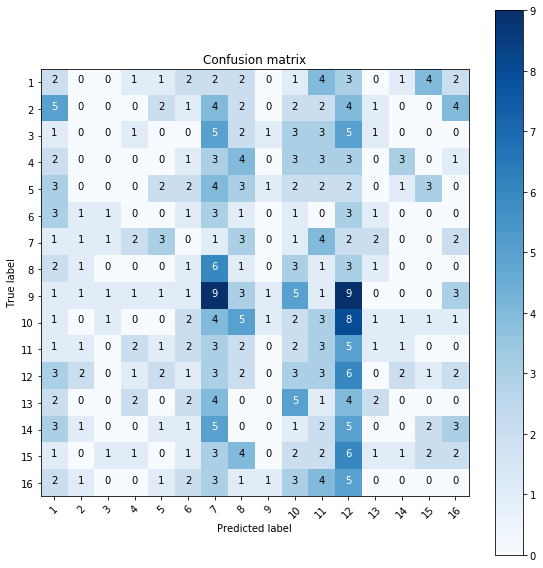

1074 seconds


"\nsome parameters are unavilible; see 'SGDClassifier().get_params().keys()'\n#'clf__max_iter': [None, ],\n#'clf__tol': [None, ],\n'clf__n_iter': None, ]  #default=None was not support, only int\n"

In [7]:
from sklearn.linear_model import SGDClassifier
starttime = datetime.now()

pipe_SGDClassifier = Pipeline([('clf', SGDClassifier(random_state=14,  n_jobs=-1))])
param_SGDClassifier = {'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], #default=hinge
                #'log': loss gives logistic regression, a probabilistic classifier.
                #'modified_huber': another smooth loss that brings tolerance to outliers as well as probability estimates.
                # 'squared_hinge': is like hinge but is quadratically penalized.             
                #'perceptron': the linear loss used by the perceptron algorithm.
                #  The other losses are designed for regression but can be useful in classification as well; 
                'clf__penalty': ['l2', 'l1', 'elasticnet', None], # default='l2' 
                'clf__alpha': [0.0001, ], #default=0.0001;  Constant that multiplies the regularization term
                'clf__l1_ratio': [0.15, ], #Default=0.15; The Elastic Net mixing parameter
                'clf__fit_intercept': [True, ],
                 #For integer/None inputs, if y is binary or multiclass, sklearn.model_selection.StratifiedKFold is used, 
                 #else, sklearn.model_selection.KFold is used.
                #'clf__max_iter': [None,],  #default=None
                #'clf__tol': [None,],  #default=None
                'clf__shuffle': [True,],  #default=True
                'clf__verbose': [0,],  #default=0
                'clf__epsilon': [0.1,],  #default=0.1
                # only if loss is 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.
                #For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. 
                #For epsilon-insensitive, any differences between the current prediction and the correct label are ignored 
                #    if they are less than this threshold.
                'clf__learning_rate': ['optimal',],  #default='optimal'
                #The learning rate schedule:
                #    ‘constant’: eta = eta0; 
                #    ‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
                #    ‘invscaling’: eta = eta0 / pow(t, power_t); 
                #where t0 is chosen by a heuristic proposed by Leon Bottou.
                'clf__eta0': [0.0,],  #default=0.01, double; The initial learning rate 
                'clf__power_t': [0.5,],  #default=0.25, double; The exponent for inverse scaling learning rate
                       'clf__class_weight': [None, 'balanced'],
                'clf__warm_start': [False,],  #default=False
                'clf__average': [False,],  #default=False
                #When set to True, computes the averaged SGD weights and stores the result in the coef_ attribute. 
                #If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. 
                #So average=10 will begin averaging after seeing 10 samples.
                'clf__n_iter': [1000,] 
                }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_SGDClassifier, param_SGDClassifier)

endtime = datetime.now()
#end = time.time()
#print(start-end)
Time = endtime - starttime
print(Time.seconds, 'seconds')
'''
some parameters are unavilible; see 'SGDClassifier().get_params().keys()'
#'clf__max_iter': [None, ],
#'clf__tol': [None, ],
'clf__n_iter': None, ]  #default=None was not support, only int
'''